In [3]:
#Importar as bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
#Carregar os Dados

data_path = './Coffee Quality Data/df_arabica_clean.csv' 
df = pd.read_csv(data_path, delimiter=',')

df = df.drop("Country of Origin", axis=1)
df = df.drop("Farm Name", axis=1)
df = df.drop("Lot Number", axis=1)
df = df.drop("Mill", axis=1)
df = df.drop("Company", axis=1)
df = df.drop("Region", axis=1)
df = df.drop("Producer", axis=1)
df = df.drop("Number of Bags", axis=1)
df = df.drop("Bag Weight", axis=1)
df = df.drop("In-Country Partner", axis=1)
df = df.drop("Harvest Year", axis=1)
df = df.drop("Grading Date", axis=1)
df = df.drop("Owner", axis=1)
df = df.drop("ICO Number", axis=1)
df = df.drop("Variety", axis=1)
df = df.drop("Status", axis=1)
df = df.drop("Processing Method", axis=1)
df = df.drop("Category One Defects", axis=1)
df = df.drop("Quakers", axis=1)
df = df.drop("Color", axis=1)
df = df.drop("Category Two Defects", axis=1)
df = df.drop("Certification Body", axis=1)
df = df.drop("Certification Address", axis=1)
df = df.drop("Certification Contact", axis=1)
df = df.drop("Expiration", axis=1)
df = df.drop("Defects", axis=1)
df = df.drop("Moisture Percentage", axis=1)
df = df.drop("Altitude", axis=1)
#df = df.drop("Total Cup Points", axis=1)


display(df)

,ID,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points
0,0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33
1,1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58
2,2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42
3,3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17
4,4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08
...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.08
203,203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.00
204,204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,79.67
205,205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,78.08


Erro Médio Quadrático (MSE): 0.013566032273559035


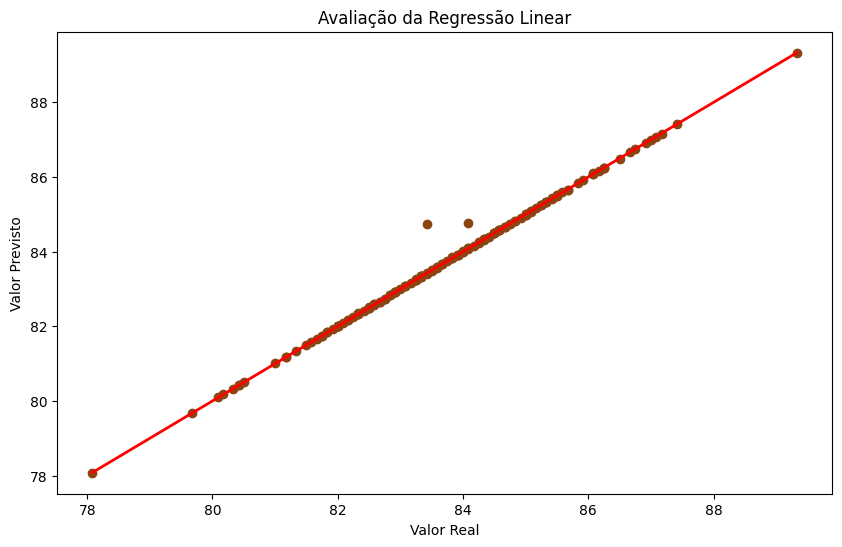

In [25]:
'''
OBJETIVO DO ALGORITMO, PREDIZER QUAIS OS MELHORES VINHOS BASEADO NAS CARACTERÍSTICAS DOS MESMOS

'''

x = df.drop("Total Cup Points", axis=1)
y = df["Total Cup Points"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrático (MSE): {mse}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='saddlebrown')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Avaliação da Regressão Linear')
plt.show()


Matriz de Confusão:
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


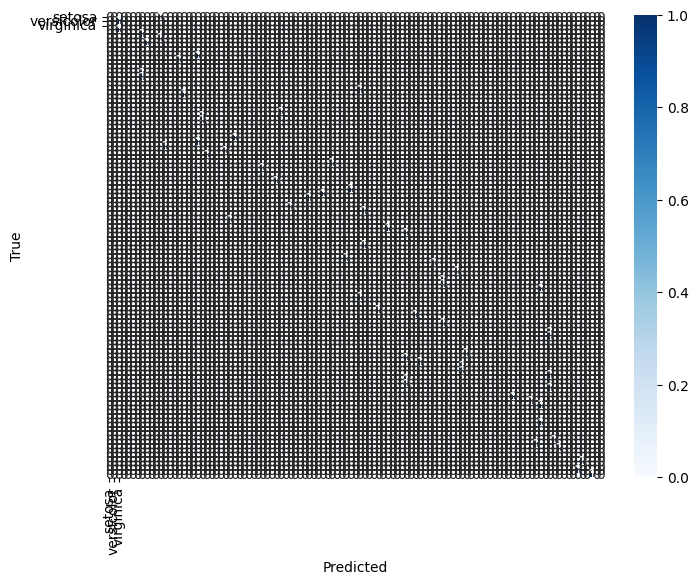

In [72]:

# Carregar o conjunto de dados Iris
iris = load_iris()
x = df.drop("ID", axis=1)
y = df["ID"]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criar o classificador da árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)

# Plotar a matriz de confusão de forma visual
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()